# Importing Libraries

In [54]:
import pandas as pd
import numpy as np

# Loading data

In [55]:
df = pd.read_csv("conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Checking Data
We want check the type of data that we are working with and also want to check if there is null data types in any columns so that we can clean the data.

In [56]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Finding correlation's

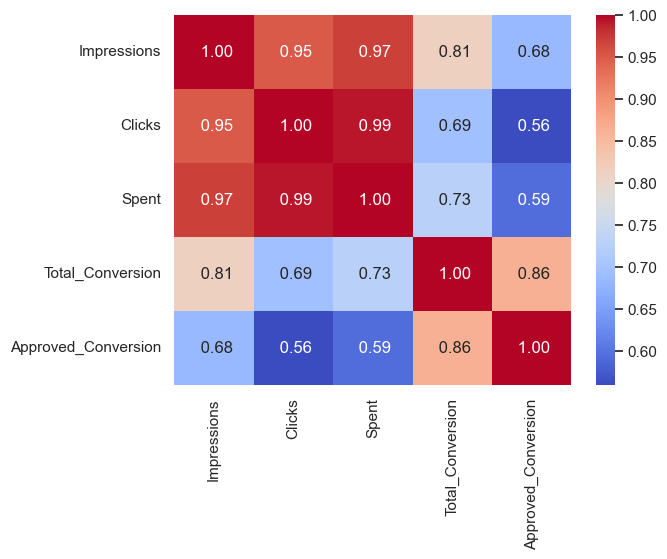

In [58]:
correlation_heatmap = sns.heatmap(df[[ "Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].corr(), annot=True, fmt=" .2f", cmap="coolwarm")

We see that Impressions and Total_conversion are the most correlated to Approved_Conversion as their heatmap values are 86% and 68%. There is a strong correlation between Spent and Clicks/ Impressions, but not Spent and Total_Conversion.

# Analysing different campaigns

In [59]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

Company XYZ had 3 different ad campaign's as shown above. To analyse the performance of each individual campaign we need to replace their needs which in turn allows us to visualise the data better.

In [60]:
df["xyz_campaign_id"].replace({916: "campaign_a", 936: "campaign_b", 1178: "campaign_c"}, inplace = True)
df.head()

/var/folders/nf/h1bcvk_j5mzbzjq2fbfl54n40000gp/T/ipykernel_8704/1525101876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["xyz_campaign_id"].replace({916: "campaign_a", 936: "campaign_b", 1178: "campaign_c"}, inplace = True)


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


Displaying plot of each campaign

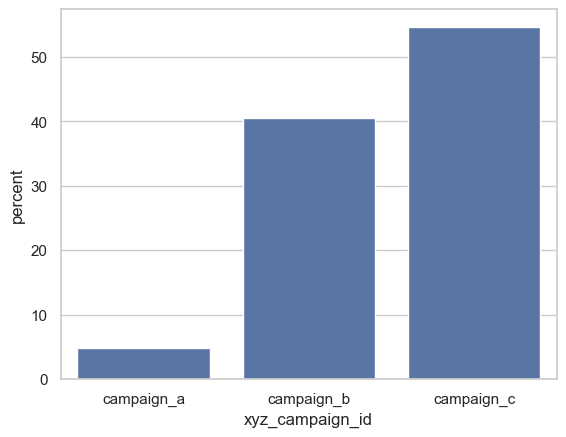

In [61]:
sns.countplot(x = 'xyz_campaign_id', data = df, stat = "percent")
plt.show()

We can see that over 50% of the ads were from campaign_c followed by roughly 40% from campaign_b and 5% from campaign_a. 

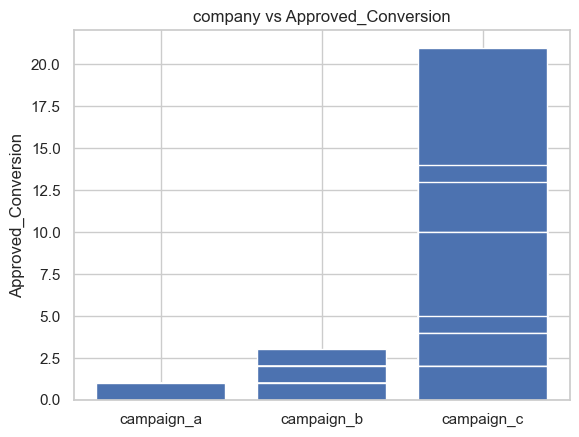

In [62]:
# Checking to see the number of Approved_conversions per campaign
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

Campaign C had the most approved conversions but also had the most ads.

## ROI

In [63]:
# Counting the number of approved conversions for each campaign
approved_conversions_by_campaign = df.groupby(
    "xyz_campaign_id")["Approved_Conversion"].sum()
print(approved_conversions_by_campaign)

xyz_campaign_id
campaign_a     24
campaign_b    183
campaign_c    872
Name: Approved_Conversion, dtype: int64


In [64]:
campaign_spent_count = df.groupby("xyz_campaign_id")["Spent"].sum()
print(campaign_spent_count.round(2))

xyz_campaign_id
campaign_a      149.71
campaign_b     2893.37
campaign_c    55662.15
Name: Spent, dtype: float64


To calculate the ROI we would need a value for the average profit pre conversion as the formula for total profit would be:
- "Profit = Approved Conversions × Average Profit per Conversion"
 
This may vary per campaign also but this data isn't provided. In our case, let's assume that profit is £100 per conversion and it is the same for every campaign. It follows that:

In [65]:
campaign_profit = 100 * approved_conversions_by_campaign
print(campaign_profit)

xyz_campaign_id
campaign_a     2400
campaign_b    18300
campaign_c    87200
Name: Approved_Conversion, dtype: int64


In [66]:
campaign_roi = (campaign_profit - campaign_spent_count) / campaign_spent_count
print(campaign_roi.round(2))

xyz_campaign_id
campaign_a    15.03
campaign_b     5.32
campaign_c     0.57
dtype: float64


## Calculating key performance indicator's (KPI's)
### Conversion rate (conversion to clicks ratio)

In [67]:
#Counting the number of clicks for each ad campaign
campaign_click_count = df.groupby("xyz_campaign_id")["Clicks"].sum()
print(campaign_click_count)

xyz_campaign_id
campaign_a      113
campaign_b     1984
campaign_c    36068
Name: Clicks, dtype: int64


In [68]:
# Counting the number of approved conversions for each campaign
approved_conversions_by_campaign = df.groupby(
    "xyz_campaign_id")["Approved_Conversion"].sum()
print(approved_conversions_by_campaign)

xyz_campaign_id
campaign_a     24
campaign_b    183
campaign_c    872
Name: Approved_Conversion, dtype: int64


In [69]:
# Calculating the ratio between the approved conversions and the number of ads for the campaign
conversion_to_click_ratio = (
    approved_conversions_by_campaign / campaign_click_count)*100
print(conversion_to_click_ratio.round(2))

xyz_campaign_id
campaign_a    21.24
campaign_b     9.22
campaign_c     2.42
dtype: float64


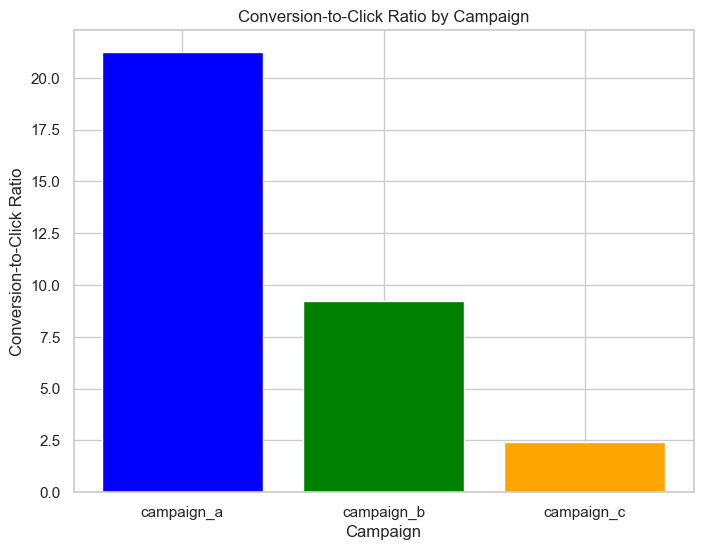

In [70]:
#Visual reprsentation
plt.figure(figsize=(8, 6))
plt.bar(conversion_to_click_ratio.index,
        conversion_to_click_ratio.values, color=['blue', 'green', 'orange'])

plt.title('Conversion-to-Click Ratio by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Conversion-to-Click Ratio')

plt.show()

We've found that campaign_a had the best impression to conversion ratio, followed by campaign_b and campaign_c.

### Calculating the impression to click ratio

In [71]:
campaign_click_count = df.groupby("xyz_campaign_id")["Clicks"].sum()
print(campaign_click_count)

xyz_campaign_id
campaign_a      113
campaign_b     1984
campaign_c    36068
Name: Clicks, dtype: int64


In [72]:
campaign_impression_count = df.groupby("xyz_campaign_id")["Impressions"].sum()
print(campaign_impression_count)

xyz_campaign_id
campaign_a       482925
campaign_b      8128187
campaign_c    204823716
Name: Impressions, dtype: int64


In [73]:
click_to_impression_ratio = (
    campaign_click_count / campaign_impression_count) * 100
print(click_to_impression_ratio.round(3))

xyz_campaign_id
campaign_a    0.023
campaign_b    0.024
campaign_c    0.018
dtype: float64


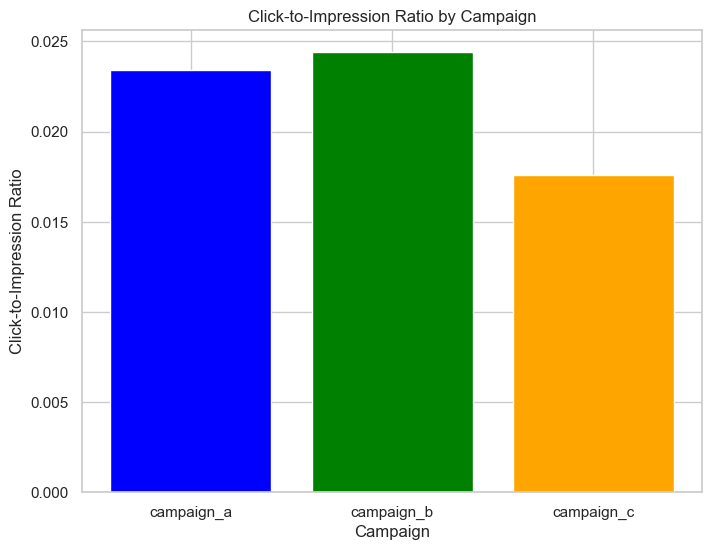

In [74]:
# Visual reprsentation
plt.figure(figsize=(8, 6))
plt.bar(click_to_impression_ratio.index,
        click_to_impression_ratio.values, color=['blue', 'green', 'orange'])

plt.title('Click-to-Impression Ratio by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Click-to-Impression Ratio')

plt.show()

Campaign A and B performed really well in terms of turning the impressions to click's where as Campaign C struggled a bit in that regard.

### Cost per click

In [75]:
campaign_spent_count = df.groupby("xyz_campaign_id")["Spent"].sum()
print(campaign_spent_count)

xyz_campaign_id
campaign_a      149.710001
campaign_b     2893.369999
campaign_c    55662.149959
Name: Spent, dtype: float64


In [76]:
cost_per_click_ratio = (campaign_spent_count/ campaign_click_count) * 100
print(cost_per_click_ratio)

xyz_campaign_id
campaign_a    132.486726
campaign_b    145.835181
campaign_c    154.325579
dtype: float64


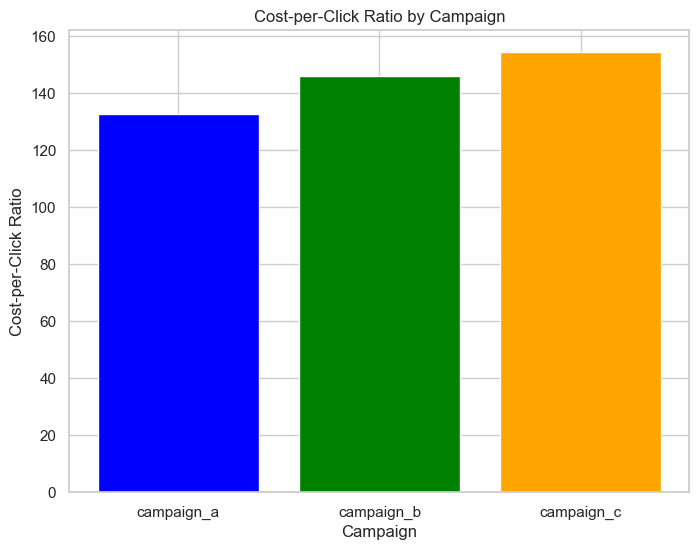

In [77]:
# Visual reprsentation
plt.figure(figsize=(8, 6))
plt.bar(cost_per_click_ratio.index,
        cost_per_click_ratio.values, color=['blue', 'green', 'orange'])

plt.title('Cost-per-Click Ratio by Campaign')
plt.xlabel('Campaign')
plt.ylabel('Cost-per-Click Ratio')

plt.show()

We can see campaign see had the highest cost per click ratio. Each campaign had a similar ratio, all falling in the 130 - 155 range.
### Adding KPI's to the DataFrame

In [78]:
# cr - conversion rate, ctr - clicks to impressions, cpc - cost per click
df["cr"] = df["Total_Conversion"] / df["Impressions"]
df["ctr"] = df["Clicks"] / df["Impressions"]
df["cpc"] = df["Spent"] / df["Clicks"]
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cr,ctr,cpc
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,0.000272,0.000136,1.43
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.000112,0.91
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,0.001443,0.000000,NaN
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,0.000235,1.25
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,0.000242,1.29


## Checking distribution with age

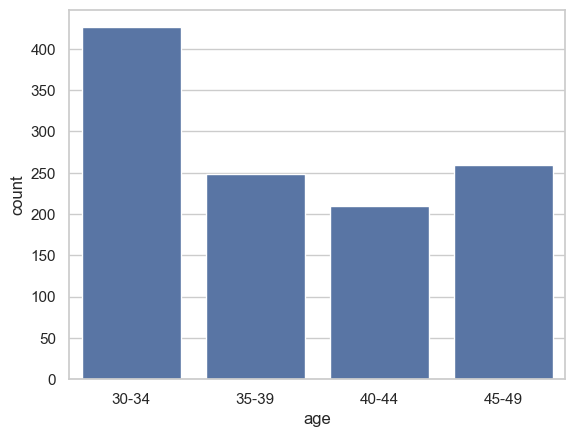

In [79]:
# Show the overall age distribution for the ads
sns.countplot(x = 'age', data = df)
plt.show()

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

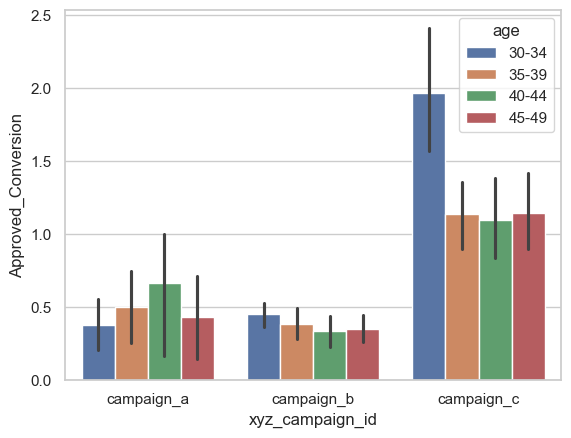

In [80]:
# Show the distribution of age for each campaign
sns.set(style = 'whitegrid')
tips = sns.load_dataset('tips')
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue = df["age"], data = tips)

Campaign C mainly converted customers aged 30-34, Campaign was quite equally distributed in the age groups it targeted and Campaign A did not follow the trend; mainly targeting those aged 40-44, followed by 35-39 and targeted those aged 30-34 the least.

## Checking gender distribution

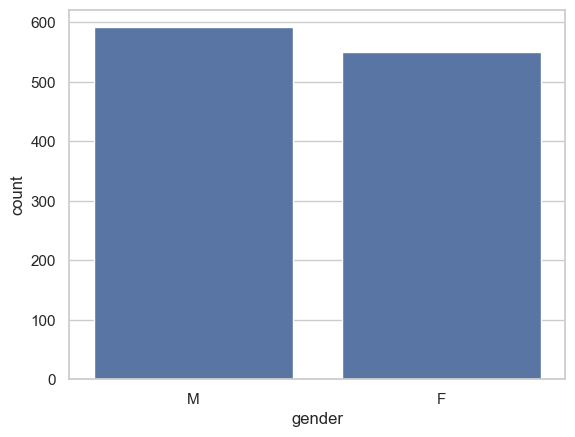

In [81]:
#Checking overall gender distribution
sns.countplot( x = "gender", data = df)
plt.show()

Almost equally distributed, men had slightly more impressions than women.

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

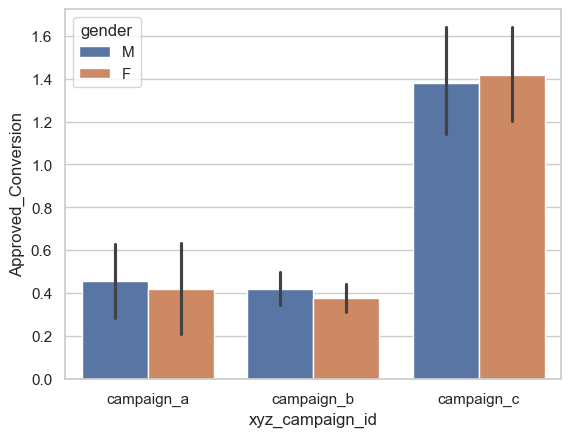

In [82]:
#Checking gender distribution for each add campaign
sns.set_style(style = "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue = df["gender"], data = tips)

Also quite equally distributed for all ad campaigns. Campaign A and B converted men slightly more where as Campaign C targeted women slightly more.

## Interest vs Approved Conversions

Plot to show how many people for each interest

<function matplotlib.pyplot.show(close=None, block=None)>

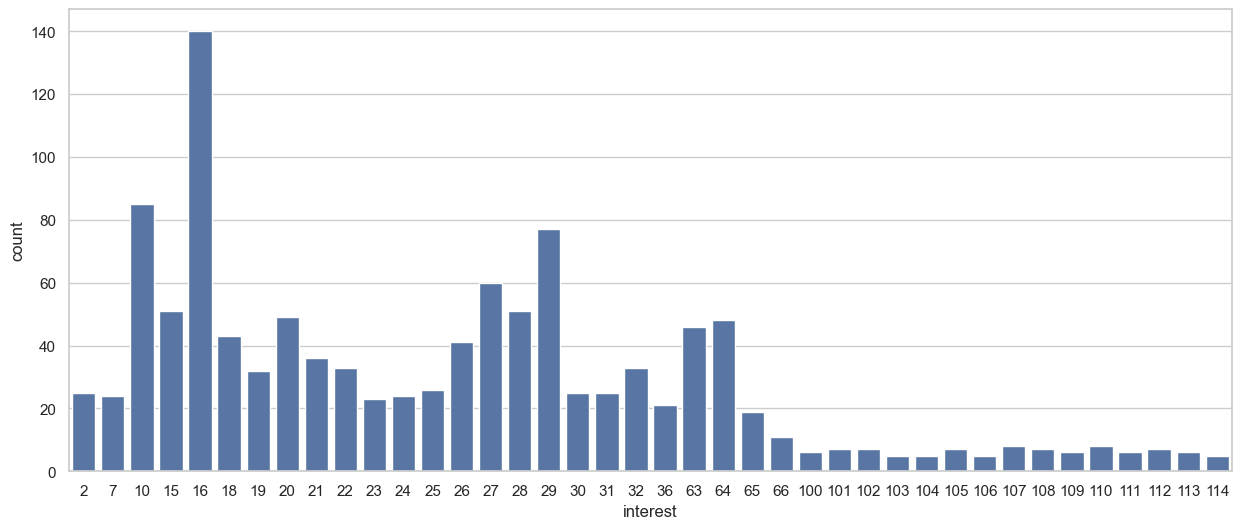

In [83]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x = 'interest', data = df)

plt.show

Scatter plot to show Interest to Approved Conversion Relationship

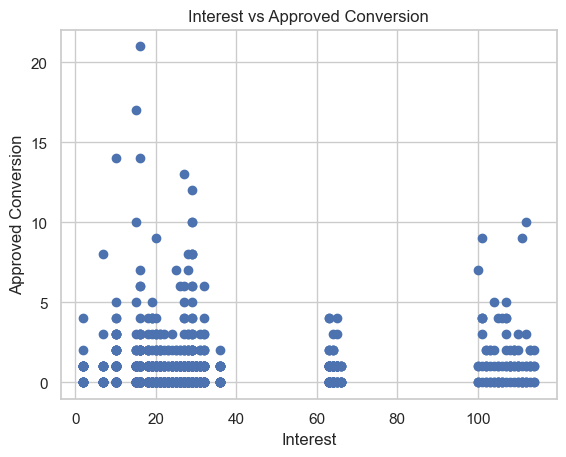

In [84]:
plt.scatter(df['interest'], df['Approved_Conversion'])
plt.title("Interest vs Approved Conversion")
plt.xlabel("Interest")
plt.ylabel("Approved Conversion")
plt.show()

Scatter plot shows what we would generally expect, more people interested leads to more approved conversions. Surprising that despite have less number of people interested in 100 there is a lot of approved conversion for this small amount of people.

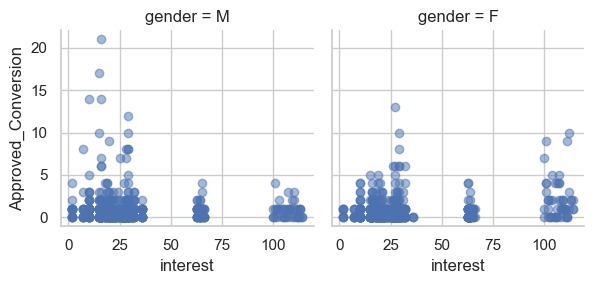

In [85]:
g = sns.FacetGrid(df, col = "gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha = .5)
g.add_legend()

Men with interest range 1-20 have higher Approved_Conversion and women with interest range 100-114 have higher Approved_Conversion (than their respective counterparts)

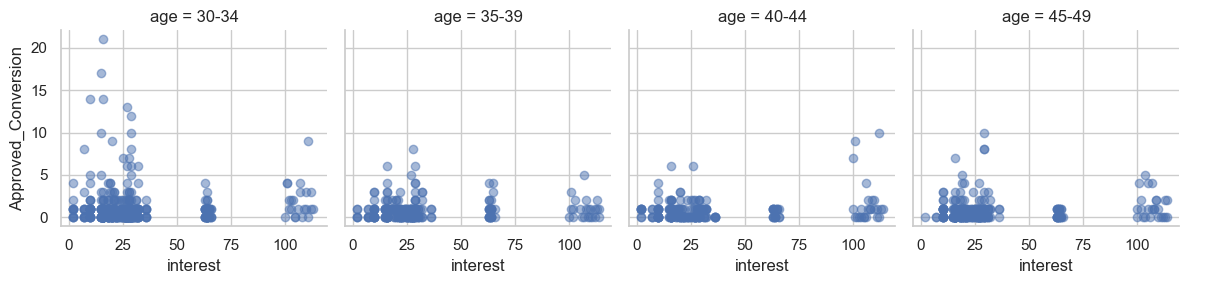

In [86]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.5)
g.add_legend()

Most approved conversions in the age 30-34 range for the interest range 1-38

## Spent vs Approved Conversions

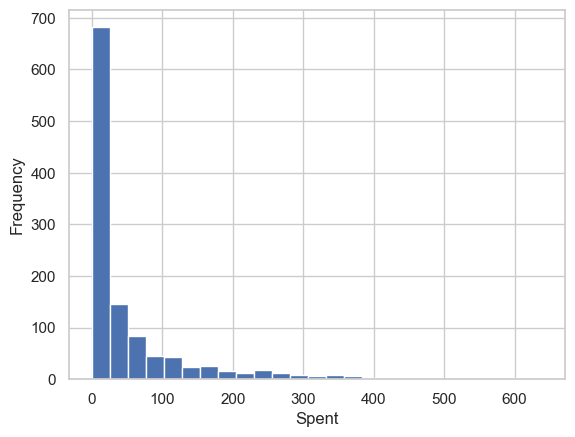

In [87]:
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

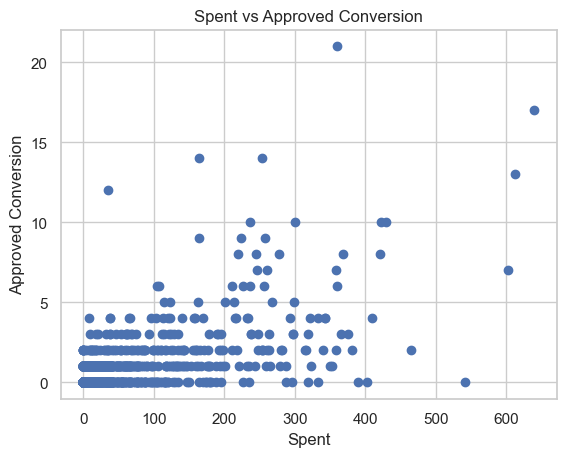

In [88]:
plt.scatter(df['Spent'], df['Approved_Conversion'])
plt.title("Spent vs Approved Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved Conversion")
plt.show()

More money spent did not lead to more approved conversions.

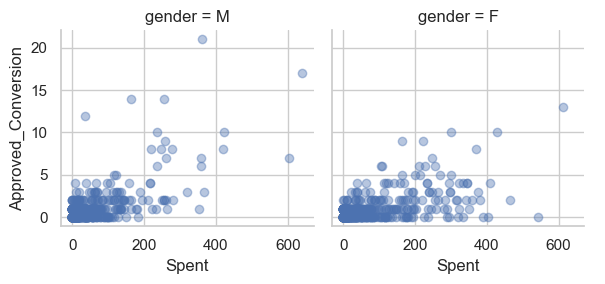

In [89]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend()

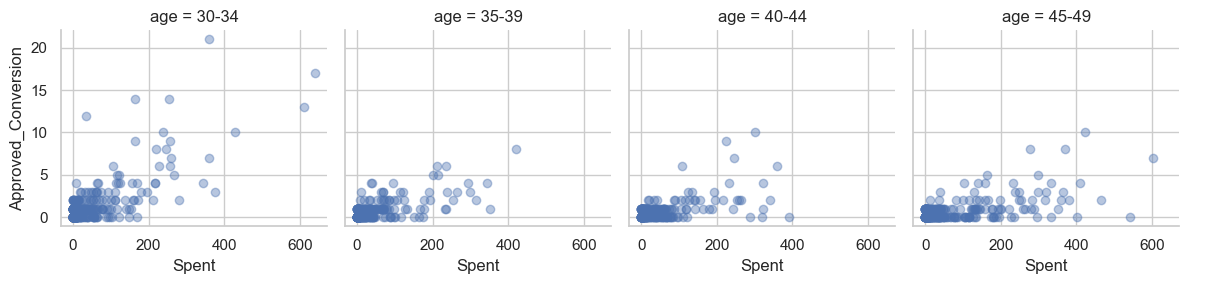

In [90]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend()

## Impressions vs Approved Conversions

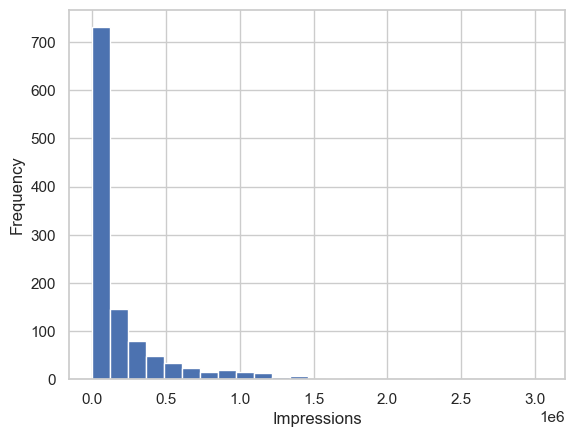

In [91]:
plt.hist(df['Impressions'], bins=25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

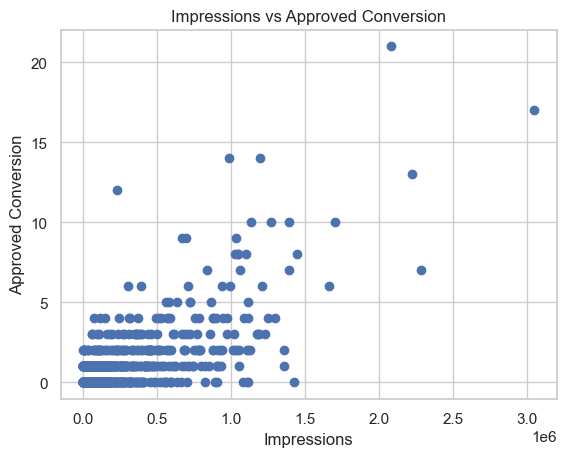

In [92]:
plt.scatter(df['Impressions'], df['Approved_Conversion'])
plt.title("Impressions vs Approved Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved Conversion")
plt.show()

There is a general positive correlation and a great increase in approved conversions after a certain number of impressions.
## Clicks vs Approved Conversions

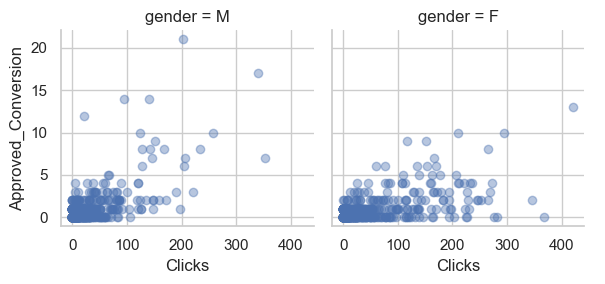

In [93]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend()

Men tend to click more than women but women buy more products than men after clicking the ad.

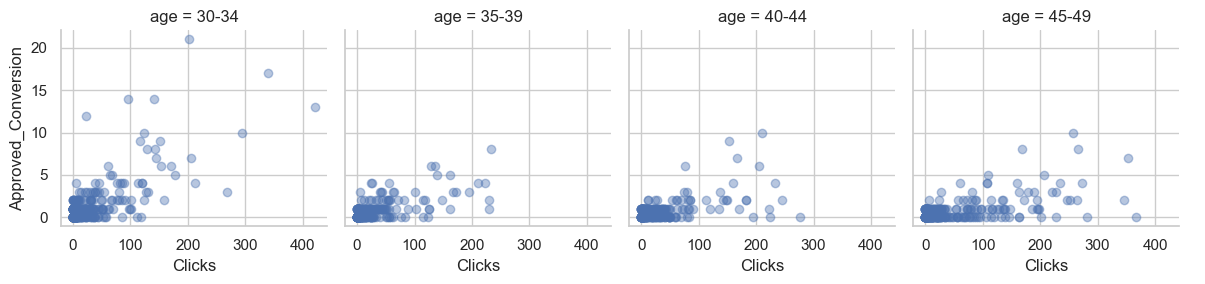

In [94]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend()

People in age group 30-34 have more of a tendency to buy products after clicking the ad.
## Total Conversion vs Approved Conversion

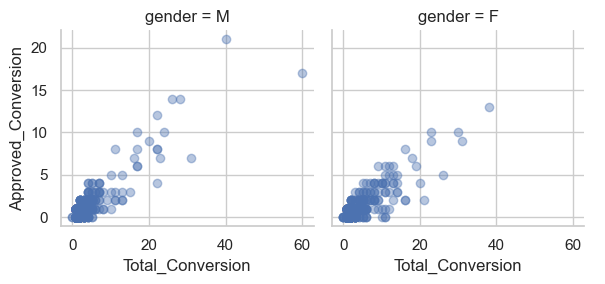

In [95]:
g = sns.FacetGrid(df, col = 'gender')
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend()

It looks like women buy more products than men after enquiring but men enquire more about the products.

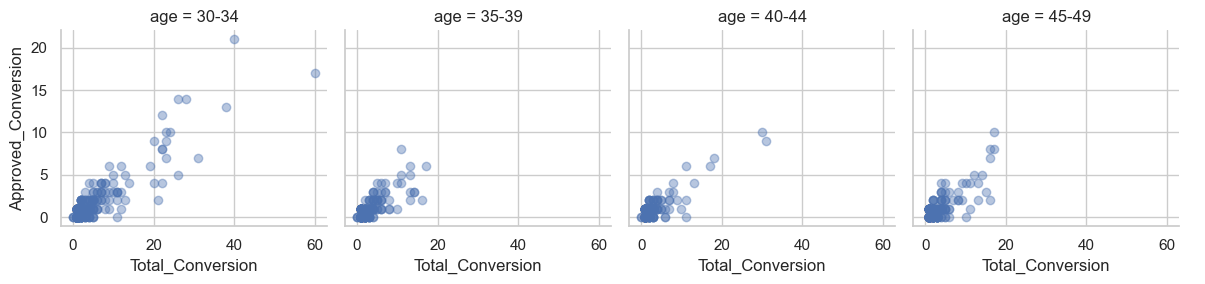

In [96]:
g = sns.FacetGrid(df, col = 'age')
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend()

People age 30-34 tend to buy the products after enquiring in comparison to other age ranges.

## Summary

Correlations:
- "Impressions" and "Total_Conversion" are most correlated with "Approved_Conversion"

Campaign Comparison:
- campaign_c had the most ads and the highest approved_conversion value out of the other campaigns
- When calculating the the approved_conversion to impression ratio, campaign_c performed by far the worst compared to other campaign's (campaign_a had a 10x higher ratio)

ROI:
- campaign_a had the highest roi (over 8x the lowest campaign_c)

Age Group:
- The age group 30-34 shows the most interest in campaign_b and campaign_c. In comparison the age group that showed the most interest for campaign_a was 40-44.

Gender:
- No real variation in interest by gender in the campaigns.

Interest:
- There was an unexpected rise of users for the interest's of 100 and up who bought the product despite making up for a smaller portion of the data. Rest of the distribution behaved as expected.

Money spent (Spent):
- There was no correlation between the amount of money spent and the the no of products bought. It did lead to more clicks and more impressions but that did not translate to a higher approved_conversion count.

Clicks:
- Men tend to click more but women tend to buy more products after clicking the ad.
- People in age group 30-34 have more of a tendency to buy the product after clicking the ad.

Add Enquiry (Total_Conversion)
- Similarly men tend to enquire more but women tend to follow through and purchase the product after enquiring.
- People in age group 30-34 have more of a tendency to buy the product after enquiring about the product.

## Business Questions
Which variables had the highest correlation to approved conversion?

- "Impressions" and "Total_Conversion" have the highest correlation with "Approved_Conversion" which indicates that that the campaign generating more impressions and more enquiries tend to lead to more conversions.

Which campaign had the highest Return on Investment (ROI)?

- Campaign A had the highest ROI, significantly outperforming the other campaigns, including Campaign C, which had the lowest ROI
Which campaign resulted in the most conversions?
- Campaign C resulted in the most approved conversions, making it the top performer in terms of raw conversion numbers, despite under-performing in other areas like ROI and conversion-to-impression ratio. This seems purely do the sheer amount of ads in the campaign.

Which age group responded best to each ads?

- For Campaign A, the age group 40-44 responded the best.
- For Campaigns B and C, the age group 30-34 responded the best.

Which gender had a highest conversion rate?

- Women had the highest conversion rate after clicking the ad, even though men clicked more frequently.
Which demographic is most profitable?
- The 30-34 age group is likely the most profitable demographic, particularly for Campaigns B and C, as they not only show high interest but also follow through on purchasing.

What characteristics define successful ads?

- Successful ads are characterized by high impressions, a strong inquiry-to-purchase follow-through, and targeted campaigns towards demographics (e.g., women, 30-34 age group) that have shown higher conversion rates.

What changes should be made to improve under-performing ads?

- For Campaign C: Focus on improving the post-click experience, targeting the right demographics, and perhaps revising the ad creative or offer to better convert impressions into purchases.
- General Recommendations: Since higher spending didn’t correlate with higher approved conversions, focus on optimizing the targeting and ad content rather than simply increasing the budget. Specifically, emphasize improving conversion rates after engagement (clicks or inquiries), especially for men who enquire more but convert less frequently than women.
- Campaign A had the best conversion rate and outperformed Campaign B despite having significantly less ads. The company should have more ads for Campaign A since it outperformed the other campaign's greatly.

# A/B Testing

To briefly describe, cr (conversion rate) describes the conversion ability for each campaign, cpc (cost per click) measures the cost efficiency for each click the ad set receive, and ctr (click through rate) shows the ability to attract and engage customers. 

To check whether the differences between ad campaigns are statistically significant, we can perform A/B testing. The main goal of A/B testing for three groups is to make pairwise comparisons between each pair of groups A-B, A-C and B-C asserting whether the differences between them are statisticsally significant or not.

We can use the post-hoc method Bonferroni correction to make the rejected significance threshold more strict to compensate for the number of inferences being made.

For the significance level, we will use the standard  α=0.05 and divide by three (the number of pairwise comparisons) to perform Bonferroni correction so α=0.01667.

## Residuals Normality check:
Null hypothesis: The distribution of the sample are close to normal.

Alternate hypothesis: The distribution of the sample are not close to normal.

    - For Conversion rate:


In [129]:
from scipy.stats import shapiro, mannwhitneyu

In [110]:
pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_a", "cr"])
pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_b", "cr"])
pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_c", "cr"])

print("p-value for Campaign A: ", pvalue1)
print("p-value for Campaign B: ", pvalue2)
print("p-value for Campaign C: ", pvalue3)

p-value for group A:  ShapiroResult(statistic=np.float64(0.6579999376649042), pvalue=np.float64(5.963335640336922e-10))
p-value for group B:  ShapiroResult(statistic=np.float64(0.49948823589032465), pvalue=np.float64(4.1502495125770925e-34))
p-value for group C:  ShapiroResult(statistic=np.float64(0.6549629418349413), pvalue=np.float64(1.2178821917771916e-33))


The p-values for the 3 groups are much lower than 0.05 so there is strong evidence against the null hypothesis.

    - For click through rate:

In [116]:
pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_a", "ctr"])
pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_b", "ctr"])
pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_c", "ctr"])

print("p-value for Campaign A: ", pvalue1)
print("p-value for Campaign B: ", pvalue2)
print("p-value for Campaign C: ", pvalue3)

p-value for group A:  ShapiroResult(statistic=np.float64(0.883068191400013), pvalue=np.float64(7.776329091101973e-05))
p-value for group B:  ShapiroResult(statistic=np.float64(0.8653622176960802), pvalue=np.float64(1.4289064771010884e-19))
p-value for group C:  ShapiroResult(statistic=np.float64(0.9904817779857137), pvalue=np.float64(0.0004589840153849015))


The p-values for the 3 groups are much lower than 0.05 so there is strong evidence against the null hypothesis.

    - For cost per click

In [120]:
pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_a", "cpc"])
pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_b", "cpc"])
pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_c", "cpc"])

print("p-value for Campaign A: ", pvalue1)
print("p-value for Campaign B: ", pvalue2)
print("p-value for Campaign C: ", pvalue3)

p-value for Campaign A:  ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))
p-value for Campaign B:  ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))
p-value for Campaign C:  ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))


In [125]:
df['cpc'] = df['cpc'].fillna(df['cpc'].mean())
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cr,ctr,cpc
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,0.000272,0.000136,1.43
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.000112,0.91
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,0.001443,0.000000,0.00
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,0.000235,1.25
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,0.000242,1.29


In [126]:
pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_a", "cpc"])
pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_b", "cpc"])
pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == "campaign_c", "cpc"])

print("p-value for Campaign A: ", pvalue1)
print("p-value for Campaign B: ", pvalue2)
print("p-value for Campaign C: ", pvalue3)

p-value for Campaign A:  ShapiroResult(statistic=np.float64(0.768409578444649), pvalue=np.float64(7.768733233031036e-08))
p-value for Campaign B:  ShapiroResult(statistic=np.float64(0.7840122206129208), pvalue=np.float64(2.588529308012372e-24))
p-value for Campaign C:  ShapiroResult(statistic=np.float64(0.7064355004471076), pvalue=np.float64(1.30539388119074e-31))


The p-values for the 3 groups are much lower than 0.05 so there is strong evidence against the null hypothesis.

Because all three groups yield p-values much lower than 0.05, there is strong evidence against the null hypothesis, and the groups' residuals are not normal.

## Mann Whitney U test

Since all three groups of all three KPIs fail to satisfy the normality condition, we can use the non-parametric Mann Whitney U test.

Null hypothesis: There is no difference (in terms of central tendency) between the two groups in the population

Alternate hypothesis: There is a difference (with respect to the central tendency) between the two groups in the population.

    - For Conversion rate:

In [134]:
pvalue1 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_a", "cr"], df.loc[df["xyz_campaign_id"] == "campaign_b", "cr"])
pvalue2 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_b", "cr"], df.loc[df["xyz_campaign_id"] == "campaign_c", "cr"])
pvalue3 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_c", "cr"], df.loc[df["xyz_campaign_id"] == "campaign_a", "cr"])

print("p-value for 916-936: ", pvalue1)
print("p-value for 936-1178: ", pvalue2)
print("p-value for 1178-916: ", pvalue3)

p-value for 916-936:  MannwhitneyuResult(statistic=np.float64(13343.0), pvalue=np.float64(0.4339652264015792))
p-value for 936-1178:  MannwhitneyuResult(statistic=np.float64(271189.0), pvalue=np.float64(1.7577705732449588e-133))
p-value for 1178-916:  MannwhitneyuResult(statistic=np.float64(889.0), pvalue=np.float64(6.636971249222306e-31))


In [135]:
pvalue1 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_a", "cpc"], df.loc[df["xyz_campaign_id"] == "campaign_b", "cpc"])
pvalue2 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_b", "cpc"], df.loc[df["xyz_campaign_id"] == "campaign_c", "cpc"])
pvalue3 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_c", "cpc"], df.loc[df["xyz_campaign_id"] == "campaign_a", "cpc"])

print("p-value for 916-936: ", pvalue1)
print("p-value for 936-1178: ", pvalue2)
print("p-value for 1178-916: ", pvalue3)

p-value for 916-936:  MannwhitneyuResult(statistic=np.float64(12267.0), pvalue=np.float64(0.7970274733773802))
p-value for 936-1178:  MannwhitneyuResult(statistic=np.float64(50416.0), pvalue=np.float64(3.206787240273558e-76))
p-value for 1178-916:  MannwhitneyuResult(statistic=np.float64(28988.0), pvalue=np.float64(1.970179254253763e-18))


In [136]:
pvalue1 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_a", "ctr"], df.loc[df["xyz_campaign_id"] == "campaign_b", "ctr"])
pvalue2 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_b", "ctr"], df.loc[df["xyz_campaign_id"] == "campaign_c", "ctr"])
pvalue3 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_c", "ctr"], df.loc[df["xyz_campaign_id"] == "campaign_a", "ctr"])

print("p-value for 916-936: ", pvalue1)
print("p-value for 936-1178: ", pvalue2)
print("p-value for 1178-916: ", pvalue3)

p-value for 916-936:  MannwhitneyuResult(statistic=np.float64(13259.5), pvalue=np.float64(0.47046238727864276))
p-value for 936-1178:  MannwhitneyuResult(statistic=np.float64(146147.0), pvalue=np.float64(0.8227876003103414))
p-value for 1178-916:  MannwhitneyuResult(statistic=np.float64(15633.0), pvalue=np.float64(0.3693064649043901))


In [137]:
pvalue1 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_a", "cpc"], df.loc[df["xyz_campaign_id"] == "campaign_b", "cpc"])
pvalue2 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_b", "cpc"], df.loc[df["xyz_campaign_id"] == "campaign_c", "cpc"])
pvalue3 = mannwhitneyu(
    df.loc[df["xyz_campaign_id"] == "campaign_c", "cpc"], df.loc[df["xyz_campaign_id"] == "campaign_a", "cpc"])

print("p-value for 916-936: ", pvalue1)
print("p-value for 936-1178: ", pvalue2)
print("p-value for 1178-916: ", pvalue3)

p-value for 916-936:  MannwhitneyuResult(statistic=np.float64(12267.0), pvalue=np.float64(0.7970274733773802))
p-value for 936-1178:  MannwhitneyuResult(statistic=np.float64(50416.0), pvalue=np.float64(3.206787240273558e-76))
p-value for 1178-916:  MannwhitneyuResult(statistic=np.float64(28988.0), pvalue=np.float64(1.970179254253763e-18))


When comparing to the adjusted significance level 0.01667, we reject the null hypothesis for campaign_b-campaign_c and campaign_c-campaign_a but not for campaign
gn_a-campaign_b. This suggests that the difference in cr, ctr and cpc between campaign_b-campaign_c and campaign_c-campaign_a is statistically significant and should be considered, while the difference of the KPIs between 916-936 is only due to chance.

This means that any spending changes to campaign_a and campaign_b would not result in a more significant impacts on conversion rate, engagement and cost per click over the other (their relative performance is the same). Conversely, there are significant differences between campaign b and campaign a to campaign c meaning that with relative increased spending the two campaigns performed much better in terms of conversion, engagement and cost efficiency than campaign c which received a much higher investment.

Based on the outcomes of the A/B testing, we can suggest that:
- The company should scale up campaign a and b due to their much higher performance in conversion rate and click through rate. Since twe don't know how precisely campaign's will change with a higher audience this should be done with caution but the outcome of the A/B testing suggests this would be beneficial.
- Campaign c was able to generate larger conversions and impressions but the efficiency of the campaign is far lower than the others. The company should look into the why there was such a lack of engagement and conversions of campaign c (especially it was exposed to a larger audience).
- The most interested audiences are from the age group 30-34. The company should target this age group for highest user engagement and interactions. On the other hand, other existing age groups should also be investigated to understand the reason for lower interactions with ad.

## Modelling

In [147]:
# encoding gender
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df["gender"])
df["gender"] = encoder.transform(df["gender"])

# encoding age
encoder.fit(df["age"])
df["age"] = encoder.transform(df["age"])

# encoding age
encoder.fit(df["xyz_campaign_id"])
df["xyz_campaign_id"] = encoder.transform(df["xyz_campaign_id"])

# # dropped "Approved_Conversion", "Total_Conversion and KPI'S"
x = np.array(df.drop(labels=["Approved_Conversion", "Total_Conversion",
                            'cr', 'ctr', 'cpc'], axis=1))
y = np.array(df["Total_Conversion"])
y = y.reshape(len(y),1)

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,cr,ctr,cpc
0,708746,campaign_a,103916,0,1,15,7350,1,1.43,2,1,0.000272,0.000136,1.43
1,708749,campaign_a,103917,0,1,16,17861,2,1.82,2,0,0.000112,0.000112,0.91
2,708771,campaign_a,103920,0,1,20,693,0,0.00,1,0,0.001443,0.000000,0.00
3,708815,campaign_a,103928,0,1,28,4259,1,1.25,1,0,0.000235,0.000235,1.25
4,708818,campaign_a,103928,0,1,28,4133,1,1.29,1,1,0.000242,0.000242,1.29
